### Analyse de la std Q1 23 France BL

In [89]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
from os import *
from os.path import *
import numpy as np 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#RECUPERATION PRIX TGP SUR LE MOIS DE JANVIER

dates = pd.date_range('2022-09-01', '2022-09-29', freq='D').to_series().dt.dayofweek
dates = dates.loc[(dates != 5) & (dates != 6)]
dates = dates.index

from kdb import *
dates  = dates.astype(str)
df = []

for d in dates:
    data = kdb(date = d, index = "FRANCE_BL")[["Start Date", "Contract type", "TGP", "Markit Std", "Markit"]]
    data = data.loc[(data["Contract type"] == "Month") &  (data["Start Date"] == "2023-01-01"), : ]
    df.append(data)

data = pd.concat(df)
data["Markit Delta"] = abs(data['TGP'] - data['Markit'])
data["Markit std %"] = (data['Markit Std'] / data['Markit']) * 100


Data retrieved from kdb for 2022-09-01
Data retrieved from kdb for 2022-09-02
Data retrieved from kdb for 2022-09-05
Data retrieved from kdb for 2022-09-06
Data retrieved from kdb for 2022-09-07
Data retrieved from kdb for 2022-09-08
Data retrieved from kdb for 2022-09-09
Data retrieved from kdb for 2022-09-12
Data retrieved from kdb for 2022-09-13
Data retrieved from kdb for 2022-09-14
Data retrieved from kdb for 2022-09-15
Data retrieved from kdb for 2022-09-16
Data retrieved from kdb for 2022-09-19
Data retrieved from kdb for 2022-09-20
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-23
Data retrieved from kdb for 2022-09-26
Data retrieved from kdb for 2022-09-27
Data retrieved from kdb for 2022-09-28
Data retrieved from kdb for 2022-09-29


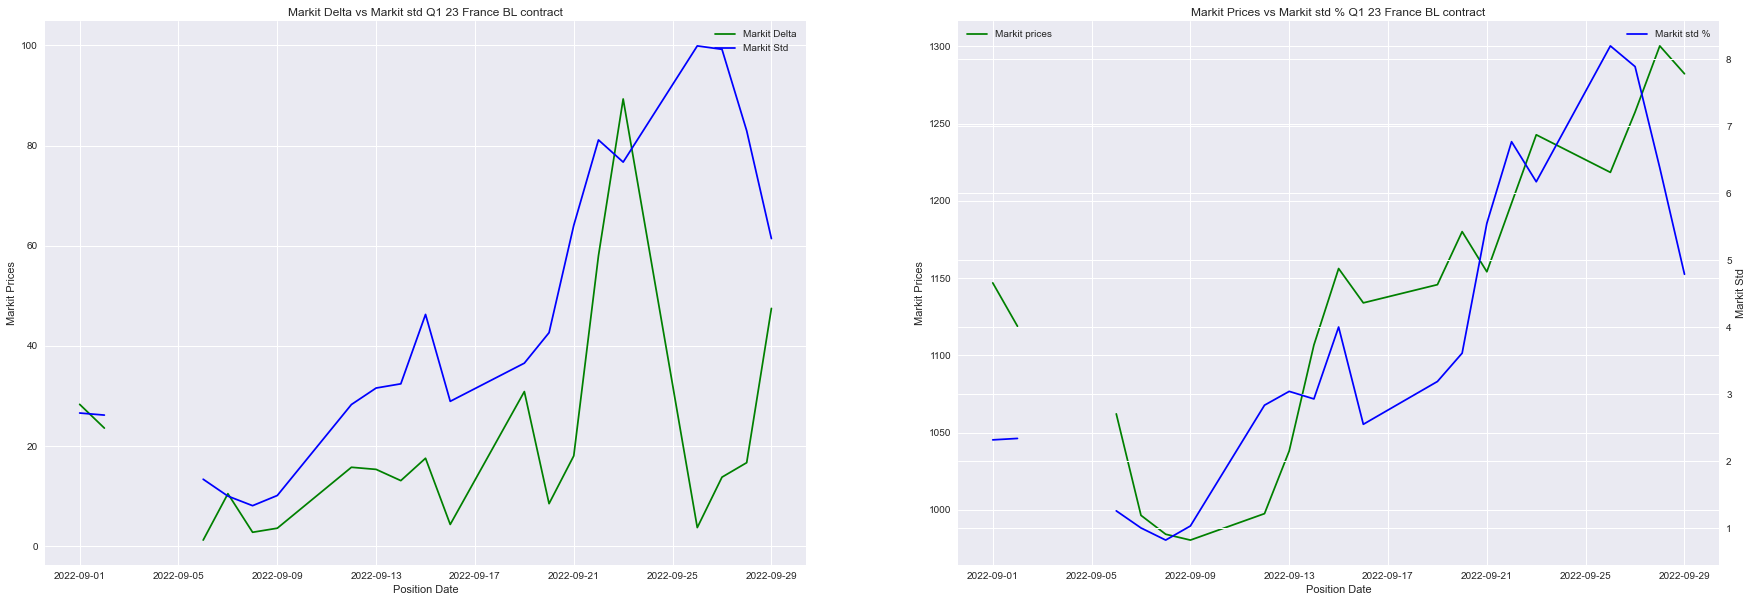

In [106]:
fig,ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.style.use('seaborn')


ax[0].plot(data.index, data["Markit Delta"], label = "Markit Delta", color = "green")
ax[0].plot(data.index, data["Markit Std"], label = "Markit Std", color = "blue")
ax[0].set_ylabel("Markit Prices")
ax[0].set_xlabel("Position Date")
ax[0].legend(loc = "upper right")
ax[0].set_title("Markit Delta vs Markit std Q1 23 France BL contract")

ax[1].plot(data.index, data["Markit"], label = "Markit prices", color = "green")
ax[1].set_ylabel("Markit Prices")
ax[1].set_xlabel("Position Date")
ax[1].legend(loc = "upper left")
ax2 = ax[1].twinx()
ax2.plot(data.index, data["Markit std %"], label = "Markit std %",  color = "blue")
ax2.legend(loc = "upper right")
ax[1].set_ylabel("Markit Prices")
ax2.set_ylabel("Markit Std")
ax[1].set_title("Markit Prices vs Markit std % Q1 23 France BL contract")


plt.show()
